In [1]:
import pickle
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
L_list=[10,12,14,16,]

# FDW_state_fluct={}
# FDW_traj_fluct={}
# O_state_fluct={}
# O_traj_fluct={}

# FDW_map={}
# O_map={}
for L in tqdm(L_list):
    with open(f'markov_L{L}.pickle','rb') as f:
        # FDW_map[L],O_map[L]=pickle.load(f)
        FDW_map,O_map=pickle.load(f)

    FDW_state_fluct[L] = state_fluct(FDW_map,L=L)
    O_state_fluct[L] = state_fluct(O_map,L=L)
    FDW_traj_fluct[L] = traj_fluct(FDW_map,L=L)
    O_traj_fluct[L] = traj_fluct(O_map,L=L)

  0%|          | 0/4 [01:02<?, ?it/s]


NameError: name 'state_fluct' is not defined

In [ ]:
# L=16
# with open(f'markov_L{L}_p0.40.pickle','rb') as f:
#     FDW10_map_0,O10_map_0=pickle.load(f)
# with open(f'markov_L{L}_p0.50.pickle','rb') as f:
#     FDW10_map_1,O10_map_1=pickle.load(f)
# with open(f'markov_L{L}_p0.60.pickle','rb') as f:
#     FDW10_map_2,O10_map_2=pickle.load(f)
# FDW14_map = np.concatenate([FDW10_map_0, FDW10_map_1, FDW10_map_2], axis=0)
# O14_map = np.concatenate([O10_map_0, O10_map_1, O10_map_2], axis=0)
# with open(f'markov_L{L}.pickle','wb') as f:
#     pickle.dump([FDW14_map,O14_map],f)

In [ ]:
def plot_comp(markov, quantum, p, log, offset= 1e-15,ylim=(1e-6,2),L=10,xlimmax=1):
    # O10_quantum_fluct
    p_list=np.array([0.1,0.2,0.3,.4,.5,.6,.7,.8,.9])
    p_idx = {p:idx for idx,p in enumerate(p_list)}
    fig,ax=plt.subplots(1,1,figsize=(4,4))
    
    bins = np.linspace(np.log10(offset),np.log10(xlimmax),30) if log else np.linspace(0,xlimmax,30)
    for p in [p]:
        if log:
            markov_ = np.log10(markov[p_idx[p]]+offset)
            quantum_ =np.log10(quantum[p,L][...,L**2:].flatten()+offset)
        else:
            markov_ = markov[p_idx[p]]
            quantum_ = quantum[p,L][...,L**2:].flatten()

        ax.hist(markov_, density=True,label=f'$p$={p},cl',alpha=0.5,histtype='step',color='blue', log=True,bins=bins)
        _=ax.hist(quantum_,bins=bins,density=True,label=f'$p$={p},q',alpha=0.5,histtype='step',color='red',log=True)
    ax.legend()
    if log:
        ax.set_xlabel(fr'$\log_{{10}}(\sigma^2[k] + 10^{{{np.log10(offset):.0f}}})$')
    else:
        ax.set_xlabel(r'$\sigma^2[k]$')
    ax.set_ylabel('PDF')
    ax.set_ylim(ylim)
    if log:
        ax.set_xlim(np.log10(offset),np.log(xlimmax))
    else:
        ax.set_xlim(0,xlimmax)

In [ ]:
def plot_L_scaling(markov, L_list, p, log, offset= 1e-15,ylim=(1e-6,2),L=10,xlimmax=1,ob='k'):
    # O10_quantum_fluct
    # p_list=np.array([0.1,0.2,0.3,.4,.5,.6,.7,.8,.9])
    p_list=np.array([.4,.5,.6])
    p_idx = {p:idx for idx,p in enumerate(p_list)}
    fig,ax=plt.subplots(1,1,figsize=(4,4))
    color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
    
    bins = np.linspace(np.log10(offset),np.log10(xlimmax),30) if log else np.linspace(0,xlimmax,30)
    for L in L_list:
        if log:
            markov_ = np.log10(markov[L][p_idx[p]]+offset)
        else:
            markov_ = markov[L][p_idx[p]]

        ax.hist(markov_, density=True,label=f'$p$={p},$L$={L},cl',alpha=0.5,histtype='step',color=next(color_list), log=True,bins=bins)
        # _=ax.hist(quantum,bins=bins,density=True,label=f'$p$={p},q',alpha=0.5,histtype='step',color='red',log=True)
    ax.legend()
    
    if log:
        ax.set_xlabel(fr'$\log_{{10}}(\sigma^2[{ob}] + 10^{{{np.log10(offset):.0f}}})$')
    else:
        ax.set_xlabel(rf'$\sigma^2[{ob}]$')
    ax.set_ylabel('PDF')
    ax.set_ylim(ylim)
    if log:
        ax.set_xlim(np.log10(offset),np.log(xlimmax))
    else:
        ax.set_xlim(0,xlimmax)

In [ ]:
def weight_zero_fluctuation(markov,epsilon = 1e-10):
    weight=[np.mean(markov_<epsilon, axis=1) for L,markov_ in markov.items()]
    return np.array(weight)

In [ ]:
def traj_fluct(data,L):
    return data[:,:,:,L**2:,0].var(axis=2).reshape((data.shape[0],-1))

In [ ]:
def state_fluct(data,L):
    return (data[:,:,:,L**2:,1] - data[:,:,:,L**2:,0]**2).reshape((data.shape[0],-1))

In [ ]:
def quantum_fluct(data,L):
    return (data[:,:,:,L**2:,1].mean(axis=2) - data[:,:,:,L**2:,0].mean(axis=2)**2).reshape((data.shape[0],-1))

In [ ]:
FDW10_quantum_fluct = quantum_fluct(FDW10_map,L=10)
O10_quantum_fluct = quantum_fluct(O10_map,L=10)

In [ ]:
dir_path = '../Paper_CIPT/Fig/'

In [ ]:
sC_traj_var_dw={}
traj_var_dw_dict={}
traj_var_dw_sem_dict={}

L_list=[10]
for L in L_list:
    with open(dir_path+f'C_m_T_L{L}.pickle','rb') as f:
        [sC_traj_var_dw_,traj_var_dw_dict_,traj_var_dw_sem_dict_]=pickle.load(f)
        sC_traj_var_dw.update(sC_traj_var_dw_)
        traj_var_dw_dict.update(traj_var_dw_dict_)
        traj_var_dw_sem_dict.update(traj_var_dw_sem_dict_)
        
    

In [104]:
L_list=[10,]
state_var_hist_dw_dict={}
for L in L_list:
    with open(dir_path+f'state_var_hist_C_m_T_L{L}.pickle','rb') as f:
        state_var_hist_dw_dict_=pickle.load(f)
    state_var_hist_dw_dict.update(state_var_hist_dw_dict_)

In [86]:
L_list = [10,]
sC_traj_var_Mz={}
traj_var_Mz_dict={}
traj_var_Mz_sem_dict={}

for L in L_list:
    with open(dir_path+f'traj_var_C_m_T_O_L{L}.pickle','rb') as f:
        [sC_traj_var_Mz_,traj_var_Mz_dict_,traj_var_Mz_sem_dict_]=pickle.load(f)
        sC_traj_var_Mz.update(sC_traj_var_Mz_)
        traj_var_Mz_dict.update(traj_var_Mz_dict_)
        traj_var_Mz_sem_dict.update(traj_var_Mz_sem_dict_)
        
    

In [105]:
L_list=[10,]
state_var_hist_Mz_dict={}
for L in L_list:
    with open(dir_path+f'state_var_hist_C_m_T_O_L{L}.pickle','rb') as f:
        state_var_hist_Mz_dict_=pickle.load(f)
    state_var_hist_Mz_dict.update(state_var_hist_Mz_dict_)

# Traj fluctuations for FDW

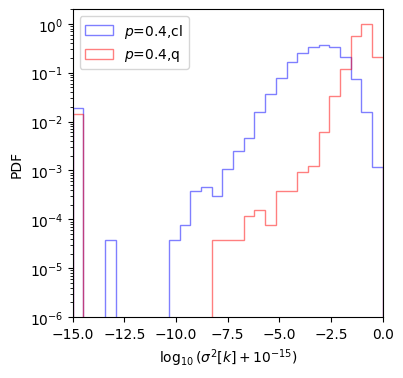

In [244]:
plot_comp(FDW10_traj_fluct,sC_traj_var_dw, 0.4,log=True,)

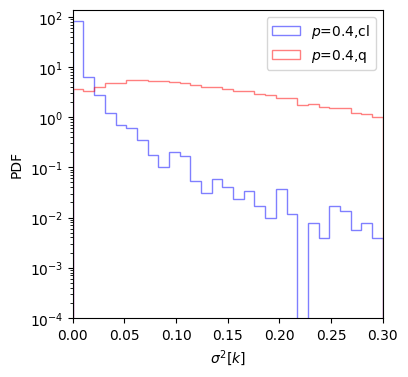

In [243]:
plot_comp(FDW10_traj_fluct,sC_traj_var_dw, 0.4,log=False,ylim=(1e-4,None),xlimmax=.3)

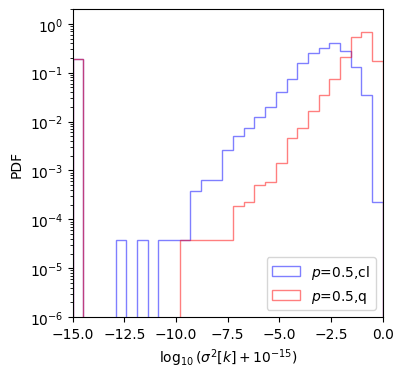

In [245]:
plot_comp(FDW10_traj_fluct,sC_traj_var_dw, 0.5,log=True)

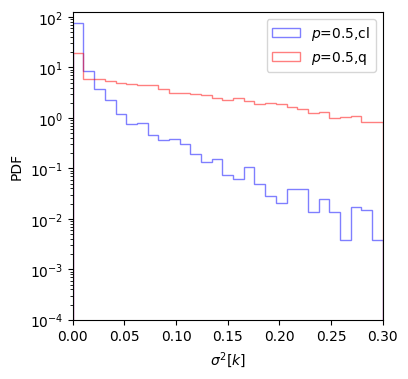

In [246]:
plot_comp(FDW10_traj_fluct,sC_traj_var_dw, 0.5,log=False,ylim=(1e-4,None),xlimmax=0.3)

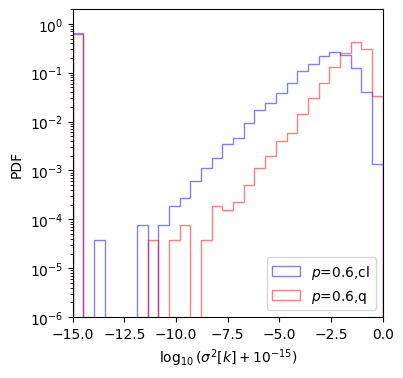

In [247]:
plot_comp(FDW10_traj_fluct,sC_traj_var_dw, 0.6,log=True)

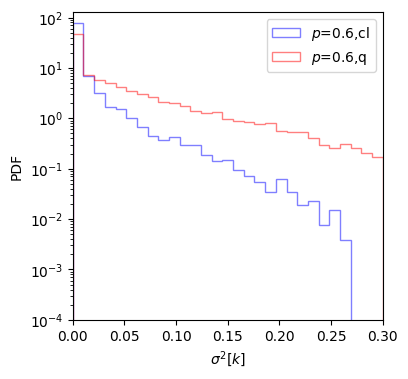

In [249]:
plot_comp(FDW10_traj_fluct,sC_traj_var_dw, 0.6,log=False,ylim=(1e-4,None),xlimmax=0.3)

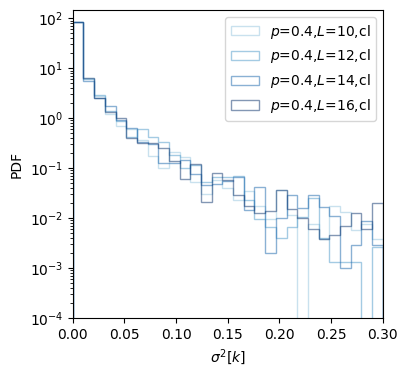

In [93]:
plot_L_scaling(FDW_traj_fluct,L_list=L_list,p=0.4,log=False,ylim=(1e-4,None),xlimmax=0.3)

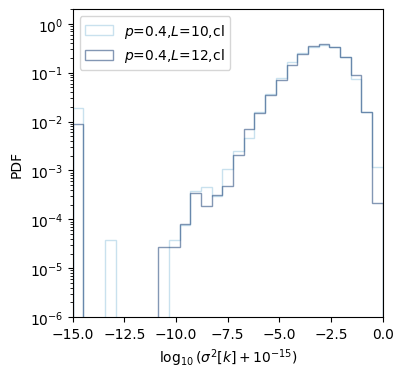

In [56]:
plot_L_scaling(FDW_traj_fluct,L_list=L_list,p=0.4,log=True)

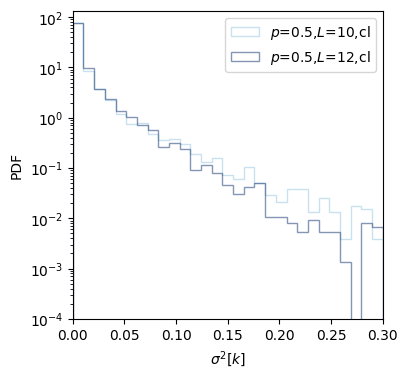

In [51]:
plot_L_scaling(FDW_traj_fluct,L_list=L_list,p=0.5,log=False,ylim=(1e-4,None),xlimmax=0.3)

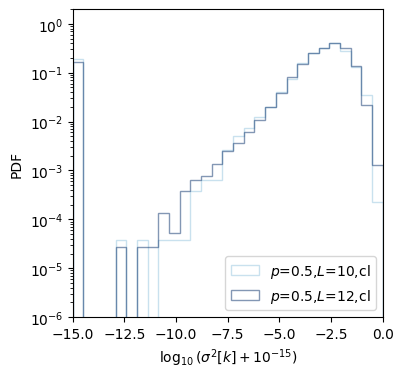

In [57]:
plot_L_scaling(FDW_traj_fluct,L_list=L_list,p=0.5,log=True)

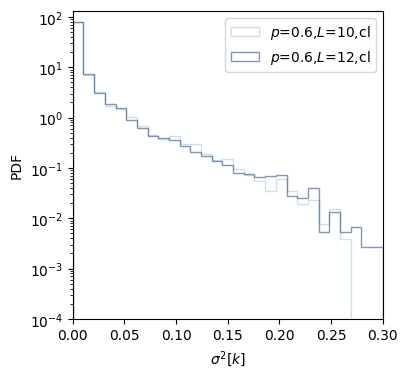

In [53]:
plot_L_scaling(FDW_traj_fluct,L_list=L_list,p=0.6,log=False,ylim=(1e-4,None),xlimmax=0.3)

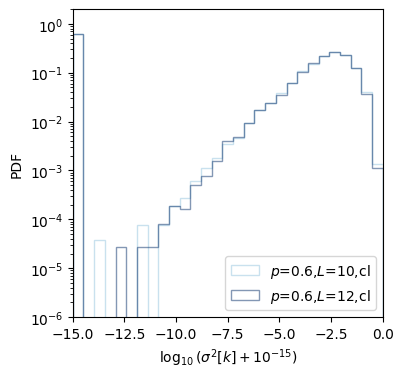

In [58]:
plot_L_scaling(FDW_traj_fluct,L_list=L_list,p=0.6,log=True)

# State fluctuation for FDW

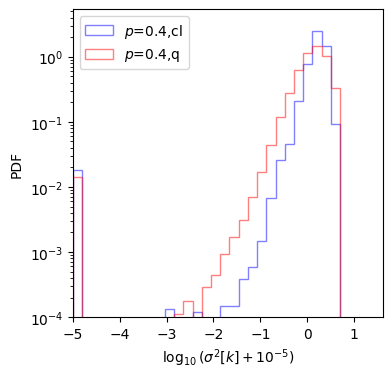

In [234]:
plot_comp(FDW10_fluct,state_var_hist_dw_dict_, 0.4,log=True,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

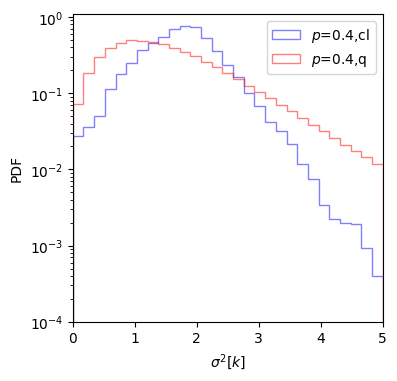

In [222]:
plot_comp(FDW10_fluct,state_var_hist_dw_dict_, 0.4,log=False,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

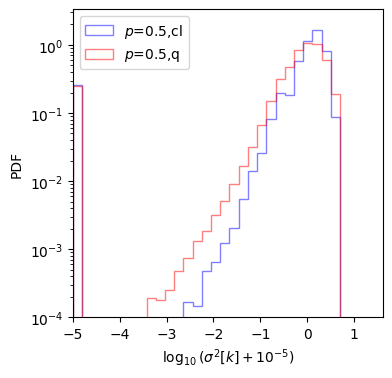

In [235]:
plot_comp(FDW10_fluct,state_var_hist_dw_dict_, 0.5,log=True,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

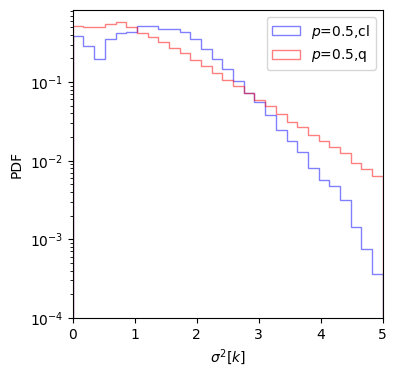

In [224]:
plot_comp(FDW10_fluct,state_var_hist_dw_dict_, 0.5,log=False,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

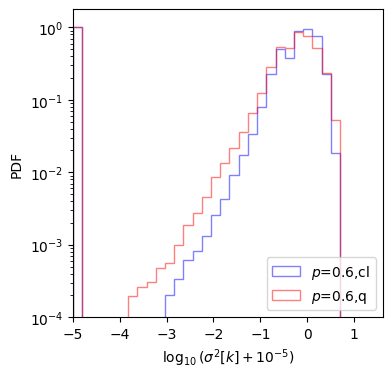

In [236]:
plot_comp(FDW10_fluct,state_var_hist_dw_dict_, 0.6,log=True,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

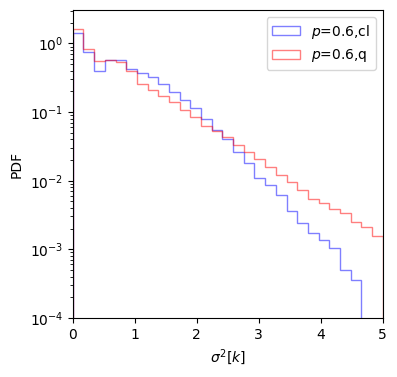

In [225]:
plot_comp(FDW10_fluct,state_var_hist_dw_dict_, 0.6,log=False,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

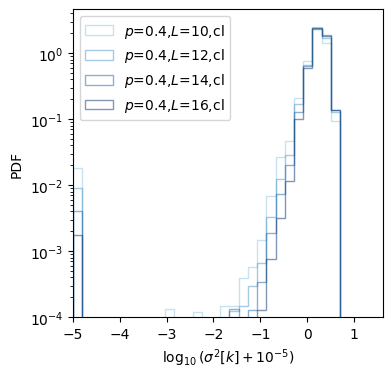

In [85]:
plot_L_scaling(FDW_state_fluct,L_list=L_list,p= 0.4,log=True,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

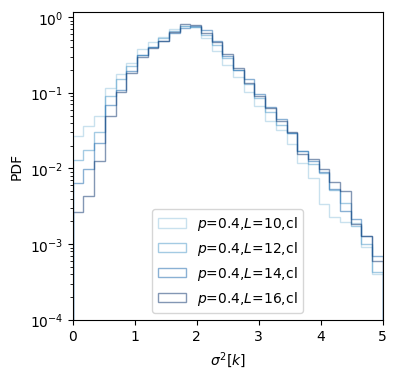

In [88]:
plot_L_scaling(FDW_state_fluct,L_list=L_list, p=0.4,log=False,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

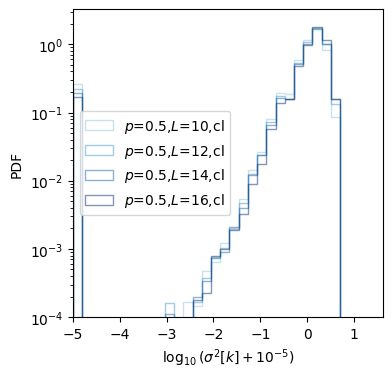

In [89]:
plot_L_scaling(FDW_state_fluct,L_list=L_list,p= 0.5,log=True,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

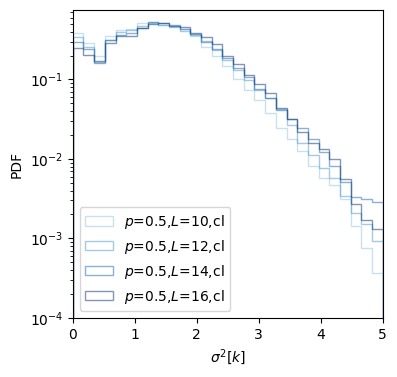

In [90]:
plot_L_scaling(FDW_state_fluct,L_list=L_list,p= 0.5,log=False,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

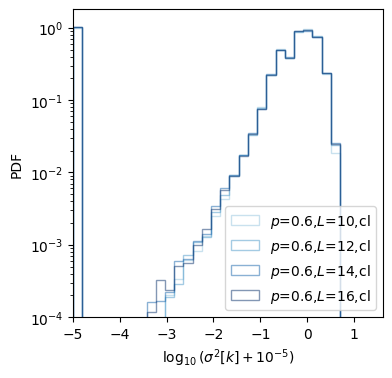

In [91]:
plot_L_scaling(FDW_state_fluct,L_list=L_list,p= 0.6,log=True,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

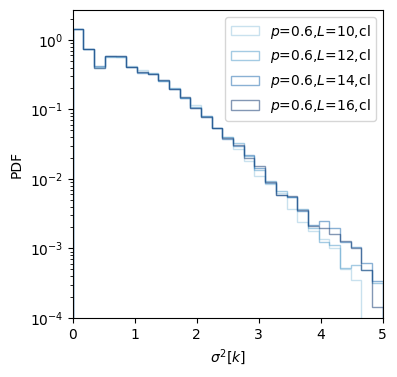

In [92]:
plot_L_scaling(FDW_state_fluct,L_list=L_list,p= 0.6,log=False,ylim=(1e-4,None),xlimmax=5,offset=1e-5)

# Quantum fluctuation for FDW

In [ ]:
plot_comp(O10_quantum_fluct,)

Text(0, 0.5, '$P(\\sigma^2[k])$')

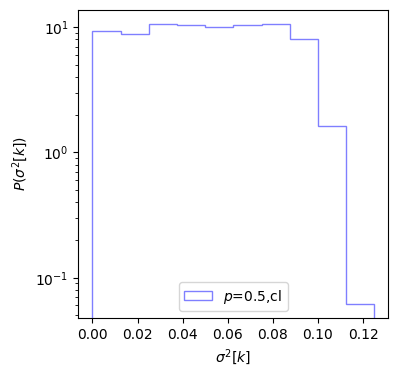

In [140]:
p_list=np.array([0.1,0.2,0.3,.4,.5,.6,.7,.8,.9])
p_idx = {p:idx for idx,p in enumerate(p_list)}
fig,ax=plt.subplots(1,1,figsize=(4,4))
offset= 1e-15
for p in [0.5]:
    ax.hist(O10_quantum_fluct[p_idx[p]], density=True,label=f'$p$={p},cl',alpha=0.5,histtype='step',color='blue', log=True,bins=np.linspace(-15,0,30))
    # ax.hist(np.log10(O10_quantum_fluct[p_idx[p]]+offset), density=True,label=f'$p$={p},cl',alpha=0.5,histtype='step',color='blue', log=True,)
    # _=ax.hist(np.log10(state_var_hist_dw_dict_[p,10][:,:,100:].flatten()+offset),bins=np.linspace(-15,0,30),density=True,label=f'$p$={p},q',alpha=0.5,histtype='step',color='red',log=True)
ax.legend()
ax.set_xlabel(r'$\sigma^2[k]$')
ax.set_ylabel(r'$P(\sigma^2[k])$')
# ax.set_ylim(1e-6,2)
# ax.set_xlim(-15,1)

# Traj fluctuations for Mz

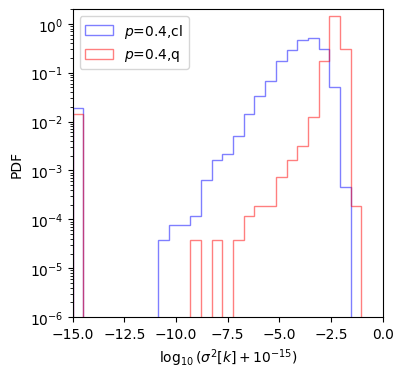

In [250]:
plot_comp(O10_traj_fluct,sC_traj_var_Mz, 0.4,log=True,)

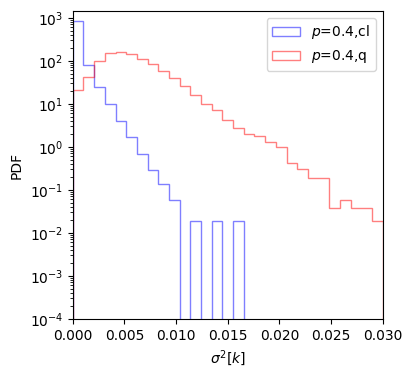

In [257]:
plot_comp(O10_traj_fluct,sC_traj_var_Mz, 0.4,log=False,ylim=(1e-4,None),xlimmax=.03)

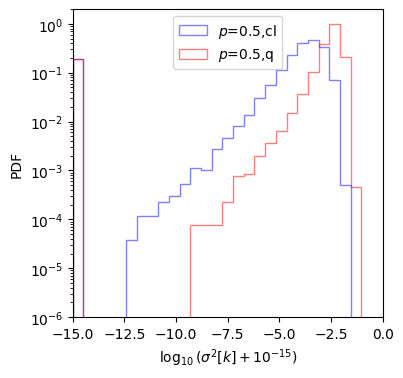

In [251]:
plot_comp(O10_traj_fluct,sC_traj_var_Mz, 0.5,log=True,)

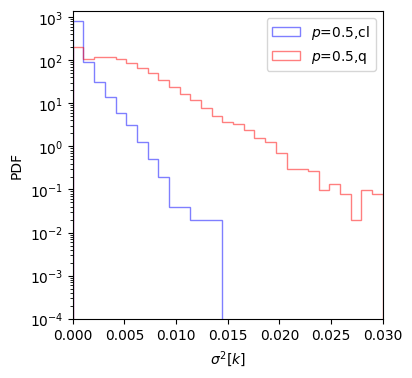

In [258]:
plot_comp(O10_traj_fluct,sC_traj_var_Mz, 0.5,log=False,ylim=(1e-4,None),xlimmax=.03)

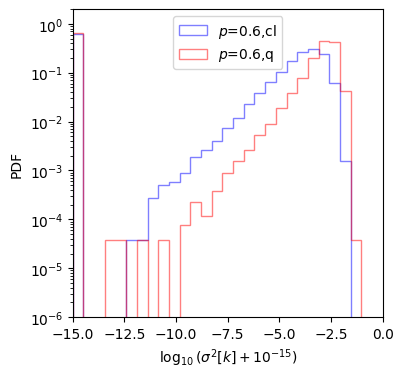

In [252]:
plot_comp(O10_traj_fluct,sC_traj_var_Mz, 0.6,log=True,)

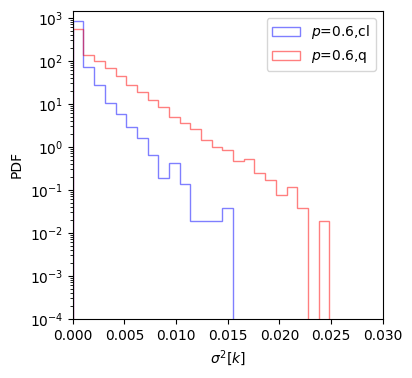

In [261]:
plot_comp(O10_traj_fluct,sC_traj_var_Mz, 0.6,log=False,ylim=(1e-4,None),xlimmax=.03)

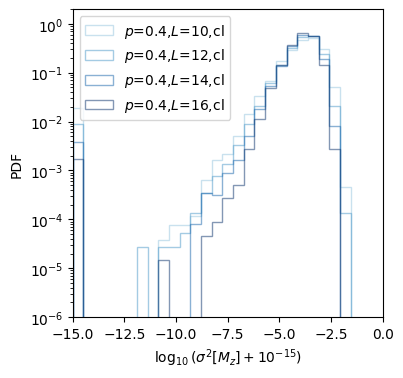

In [79]:
plot_L_scaling(O_traj_fluct,L_list=L_list,p=0.4,log=True,ob='M_z')

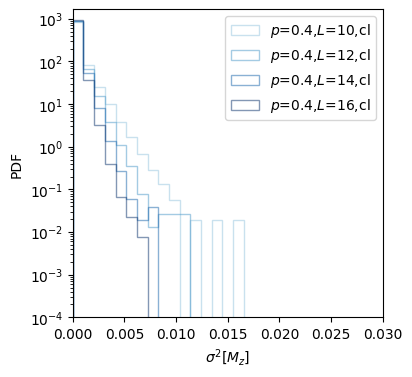

In [80]:
plot_L_scaling(O_traj_fluct,L_list=L_list,p=0.4,log=False,ylim=(1e-4,None),xlimmax=0.03,ob='M_z')

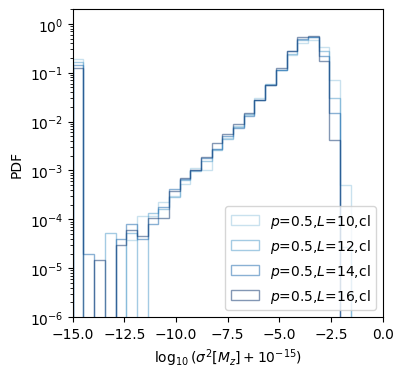

In [81]:
plot_L_scaling(O_traj_fluct,L_list=L_list,p=0.5,log=True,ob='M_z')

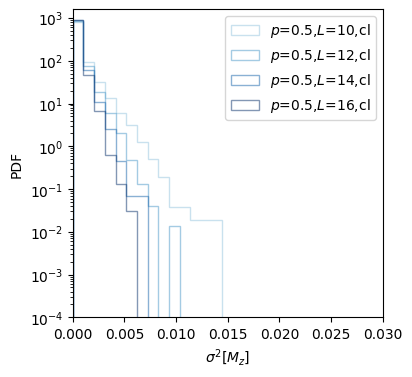

In [82]:
plot_L_scaling(O_traj_fluct,L_list=L_list,p=0.5,log=False,ylim=(1e-4,None),xlimmax=0.03,ob='M_z')

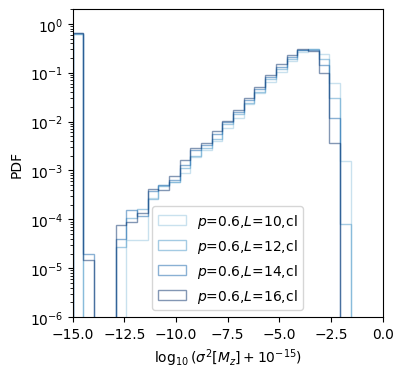

In [83]:
plot_L_scaling(O_traj_fluct,L_list=L_list,p=0.6,log=True,ob='M_z')

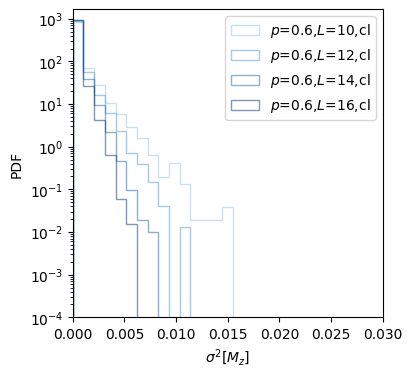

In [84]:
plot_L_scaling(O_traj_fluct,L_list=L_list,p=0.6,log=False,ylim=(1e-4,None),xlimmax=0.03,ob='M_z')

# State fluctuations for Mz

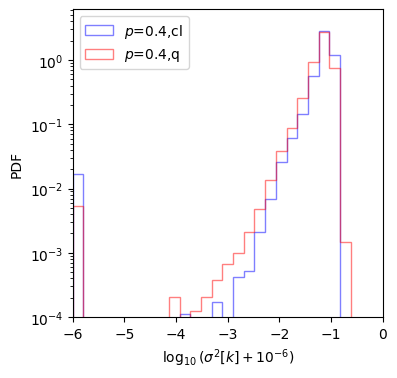

In [265]:
plot_comp(O10_fluct,state_var_hist_Mz_dict_, 0.4,log=True,offset=1e-6,ylim=(1e-4,None))

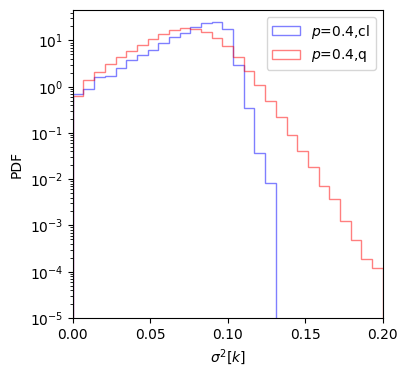

In [274]:
plot_comp(O10_fluct,state_var_hist_Mz_dict_, 0.4,log=False,offset=1e-6,ylim=(1e-5,None),xlimmax=0.2)

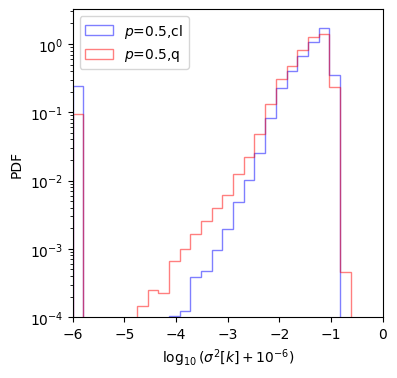

In [275]:
plot_comp(O10_fluct,state_var_hist_Mz_dict_, 0.5,log=True,offset=1e-6,ylim=(1e-4,None))

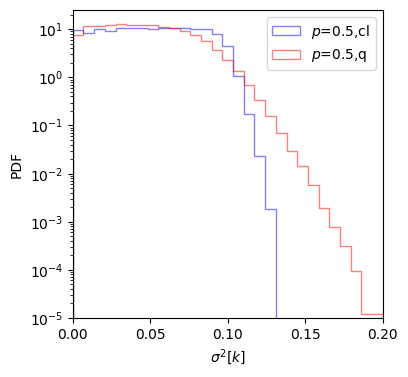

In [ ]:
plot_comp(O10_fluct,state_var_hist_Mz_dict_, 0.5,log=False,offset=1e-6,ylim=(1e-5,None),xlimmax=0.2)

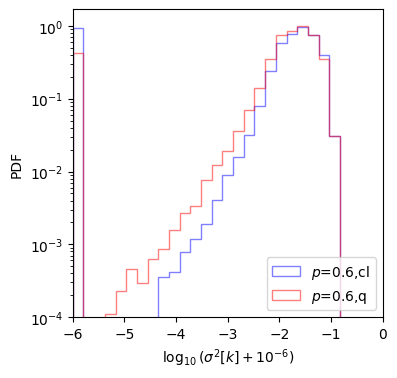

In [267]:
plot_comp(O10_fluct,state_var_hist_Mz_dict_, 0.6,log=True,offset=1e-6,ylim=(1e-4,None))

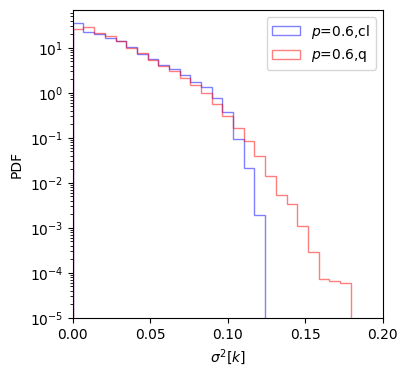

In [277]:
plot_comp(O10_fluct,state_var_hist_Mz_dict_, 0.6,log=False,offset=1e-6,ylim=(1e-5,None),xlimmax=0.2)

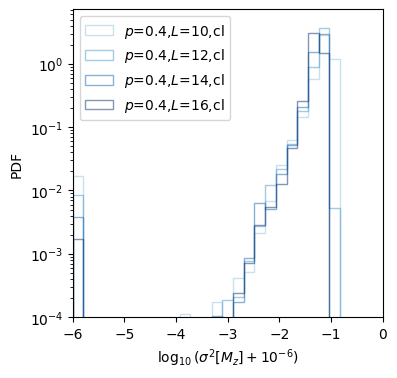

In [62]:
plot_L_scaling(O_state_fluct, L_list,0.4,log=True,offset=1e-6,ylim=(1e-4,None),ob='M_z')

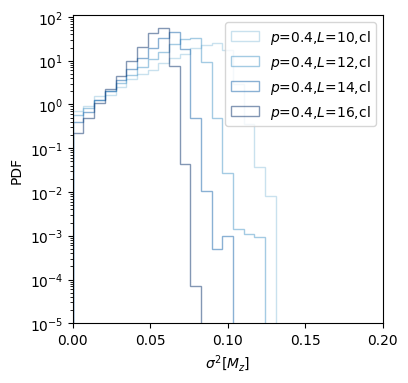

In [63]:
plot_L_scaling(O_state_fluct, L_list, 0.4,log=False,offset=1e-6,ylim=(1e-5,None),xlimmax=0.2,ob='M_z')

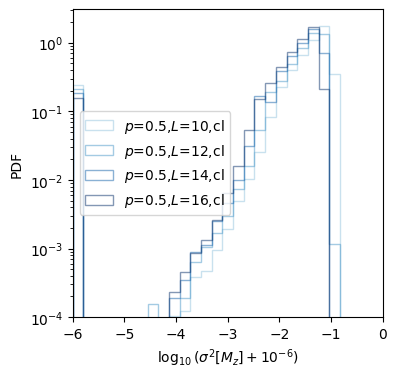

In [64]:
plot_L_scaling(O_state_fluct, L_list,0.5,log=True,offset=1e-6,ylim=(1e-4,None),ob='M_z')

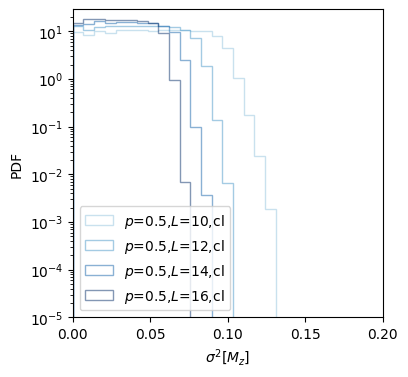

In [65]:
plot_L_scaling(O_state_fluct, L_list, 0.5,log=False,offset=1e-6,ylim=(1e-5,None),xlimmax=0.2,ob='M_z')

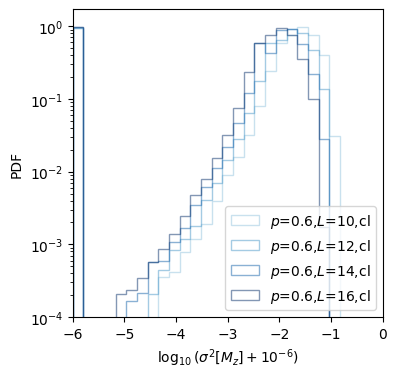

In [66]:
plot_L_scaling(O_state_fluct, L_list,0.6,log=True,offset=1e-6,ylim=(1e-4,None),ob='M_z')

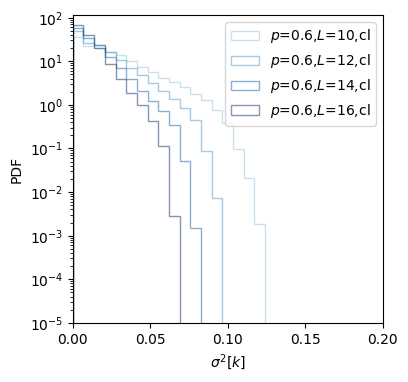

In [28]:
plot_L_scaling(O_state_fluct, L_list, 0.6,log=False,offset=1e-6,ylim=(1e-5,None),xlimmax=0.2)

In [39]:
O_state_fluct_weight=weight_zero_fluctuation(O_state_fluct)

In [68]:
def plot_weight_zero_fluctuation(weight,p_list=[.4,.5,.6],idx=0,log='linear'):
    fig,ax=plt.subplots(1,1,figsize=(4,4))
    ax.plot(L_list,weight[:,idx],'.-',label=f'$p$={p_list[idx]}')
    ax.set_xlabel(r'$L$')
    ax.set_ylabel(r'$P(\sigma^2 < 10^{-10})$')
    if log == 'semilog':
        ax.set_yscale('log')
    elif log == 'log':
        ax.set_xscale('log')
        ax.set_yscale('log')

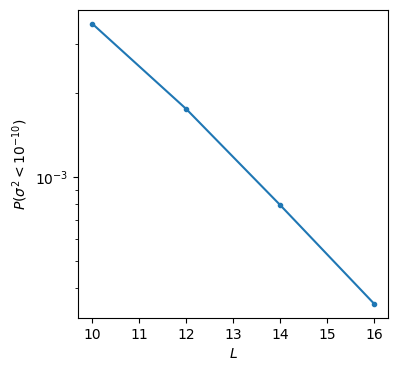

In [70]:
plot_weight_zero_fluctuation(O_state_fluct_weight,idx=0,log='semilog')

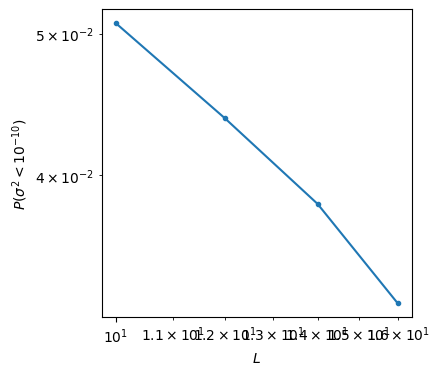

In [72]:
plot_weight_zero_fluctuation(O_state_fluct_weight,idx=1,log='log')

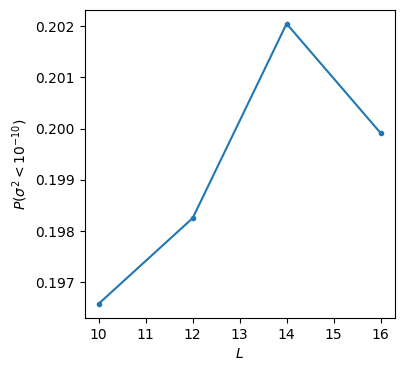

In [75]:
plot_weight_zero_fluctuation(O_state_fluct_weight,idx=2,)

In [77]:
np.polyfit(np.log(L_list),np.log(O_state_fluct_weight[:,1]),1)

array([-0.93037736, -0.82636797])

Text(0, 0.5, '$P(\\sigma^2[M_z])$')

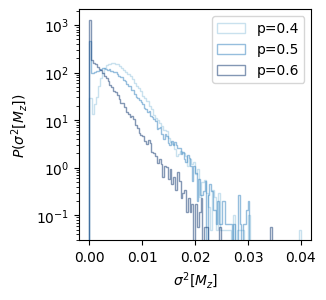

In [98]:
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,3)))
fig,ax=plt.subplots(figsize=(3,3))
for p in [0.4,0.5,0.6]:
    _=ax.hist(sC_traj_var_Mz[p,10][:,100:].flatten(),bins=100,density=True,label=f'p={p}',alpha=0.5,histtype='step',color=next(color_list),log=True)

ax.legend()
# ax.set_xlim(0,0.3)
# ax.set_ylim(1e-1,1e2)
ax.set_xlabel(r'$\sigma^2[M_z]$')
ax.set_ylabel(r'$P(\sigma^2[M_z])$')

In [ ]:
# Zero weights

Text(0, 0.5, '$P(\\sigma^2[M_z])$')

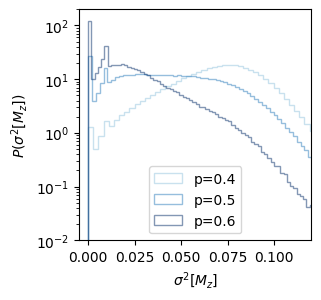

In [99]:
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,3)))
fig,ax=plt.subplots(figsize=(3,3))
for p in [0.4,0.5,0.6]:
    _=ax.hist(state_var_hist_dict[p,10][:,:,100:].flatten(),bins=100,density=True,label=f'p={p}',alpha=0.5,histtype='step',color=next(color_list),log=True)

ax.legend()
ax.set_xlim(-.5e-2,.12)
ax.set_ylim(1e-2,2e2)
# ax.set_xscale('log')
ax.set_xlabel(r'$\sigma^2[M_z]$')
ax.set_ylabel(r'$P(\sigma^2[M_z])$')

(-15.0, 1.0)

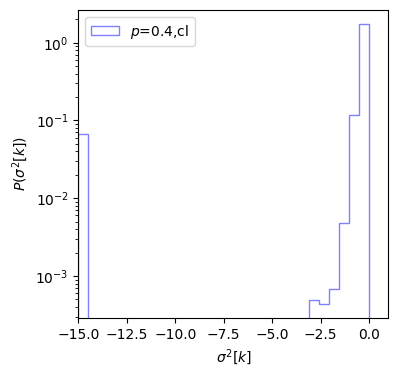

In [100]:
p_list=np.array([0.1,0.2,0.3,.4,.5,.6,.7,.8,.9])
p_idx = {p:idx for idx,p in enumerate(p_list)}
fig,ax=plt.subplots(1,1,figsize=(4,4))
offset= 1e-15
for p in [0.4]:
    ax.hist(np.log10(FDW10_fluct[p_idx[p]]+offset), density=True,label=f'$p$={p},cl',alpha=0.5,histtype='step',color='blue', log=True,bins=np.linspace(-15,0,30))
    # _=ax.hist(np.log10(sC_traj_var_dw[p,10][:,100:].flatten()+offset),density=True,label=f'$p$={p},q',alpha=0.5,histtype='step',color='red',log=True,bins=np.linspace(-15,0,30))
ax.legend()
ax.set_xlabel(r'$\sigma^2[k]$')
ax.set_ylabel(r'$P(\sigma^2[k])$')
# ax.set_ylim(1e-6,1)
ax.set_xlim(-15,1)

Text(0, 0.5, '$P(\\sigma^2[M_z])$')

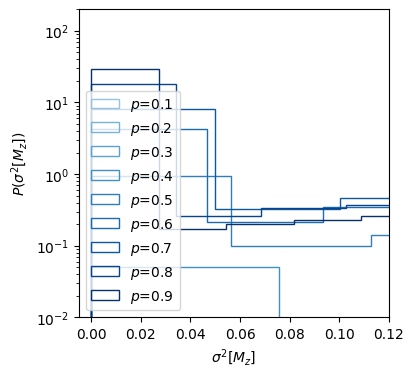

In [101]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
color_list = plt.cm.Blues(np.linspace(0.4,1,len(p_list)))

for i in range(FDW10_fluct.shape[0]):
    ax.hist(FDW10_fluct[i], bins=100, density=True,label=f'$p$={p_list[i]}',histtype='step',color=color_list[i],log=True)

ax.legend()
ax.set_xlim(-.5e-2,.12)
ax.set_ylim(1e-2,2e2)
# ax.set_xscale('log')
ax.set_xlabel(r'$\sigma^2[M_z]$')
ax.set_ylabel(r'$P(\sigma^2[M_z])$')

Text(0, 0.5, '$P(\\sigma^2[k])$')

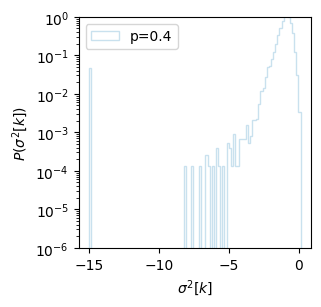

In [102]:
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,3)))
fig,ax=plt.subplots(figsize=(3,3))
for p in [0.4,]:
    _=ax.hist(np.log10(sC_traj_var_dw[p,10][:,100:].flatten()+offset),bins=100,density=True,label=f'p={p}',alpha=0.5,histtype='step',color=next(color_list),log=True)

ax.legend()
# ax.set_xscale('log')
# ax.set_xlim(0,0.3)
ax.set_ylim(1e-6,1)
ax.set_xlabel(r'$\sigma^2[k]$')
ax.set_ylabel(r'$P(\sigma^2[k])$')